In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read the image

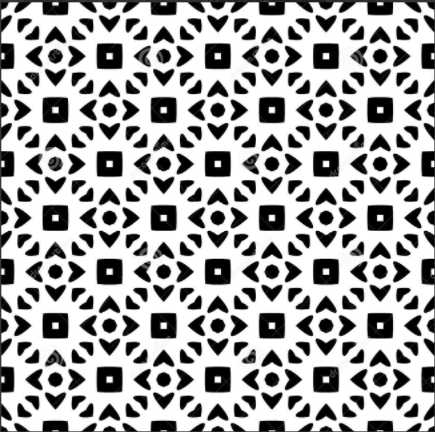

In [2]:
img = Image.open('patterns.png').convert('L')
img

In [3]:
img = np.array(img)

## 1) Find the centers of arrows pointing to the right (or any other simple shape from the image). Let us denote the image by $A\in \mathbb{R}^{H\times W}$.

Recall that the unique solution of the optimization problem ($x_0 \neq 0$)
$$
\begin{cases}
<x, x_0> \longrightarrow max \\
\|x\| = 1
\end{cases}
\qquad \qquad (*)
$$
is $x = \frac{x_0}{\|x_0\|}$.

### If we have a repeated pattern on an image, we can detect it by the following way:
- let's denote an instance of this pattern by $\tilde{\omega}\in \mathbb{R}^{h\times w}$.
- imagine $\tilde{\omega}$ being repeated in the image on the positions $k_1, k_2, \ldots, k_m$, i.e. the part (of the image $A$) of size $h\times w$ centered in $k_j$th pixel (for $j\in\{1,\ldots, m\}$) is equal (in practise similar) to the pattern $\tilde{\omega}$. We need to find $\{k_1, \ldots, k_m\}$.
- let's denote the part (of the image $A$) of size $h\times w$ centered in $k$th pixel  by $\omega_k$. So, we will get that 
$$
\omega_k \approx \tilde{\omega} \; \mbox{ for } \; k\in\{k_1,\ldots, k_m\}
$$
### Now, let's find the $k$s, for which $\omega_k$ is similar to the $\tilde{\omega}$. 
- we define similarity of two vectors $u, v\in \mathbb{R}^{N}$ (here $N = h\cdot w$) by the cross-correlation of them (the problem $(*)$ gives some intuition to interpret this measure as similarity): 
$$
similarity(u,v) = <\frac{u}{\|u_0\|}, \frac{v}{\|v_0\|}>
$$
- so we need to find the $\omega_k$s, for which their cross-correlation with the $\tilde{\omega}$ is high, i.e. the dot product
$$
<\frac{\omega_k}{\|\omega_k\|}, \frac{\tilde{\omega}}{\|\tilde{\omega}\|}>
$$
is high.

### Hence, let's obtain an image $B$ with $k$th entry equals to $<\frac{\omega_k}{\|\omega_k\|}, \frac{\tilde{\omega}}{\|\tilde{\omega}\|}>$, then observe high values of $B$.

#### For this we need to
- convolve the image $A$ with the kernel $\tilde{\omega}$. The result is denoted by $\tilde{A}$. Note that $k$th entry of $\tilde{A}$ is equal to $<\omega_k, \tilde{\omega}>$;
- obtain the image $\overline{A}$ with $k$th entry equals to $\|\omega_k\|$ ($l_2$ norm of the $\omega_k$) ($\overline{A}^2$ can be obtained with the convolution with kernel ones on the image $A^2$);
- obtain the number $\overline{\tilde{\omega}}$ which is the $l_2$ norm of the kernel;
- divide the image $\tilde{A}$ by the image $\overline{A}$ and the number $\overline{\tilde{\omega}}$ to obtain the image $B$.

In [4]:
from scipy.signal import correlate2d

In [5]:
def get_pattern(img, kernel):
    ones = np.ones_like(kernel)
    kernel_norm = np.linalg.norm(kernel) # TODO calculate the l2 norm of the kernel
    tilde_A =  correlate2d(img,kernel,mode = 'same') # TODO obtain the image \tilde{A}
    overline_A = np.sqrt(correlate2d(img*img,ones, mode = 'same'))   # TODO obtain the image \overline{A}
    B = tilde_A / (overline_A * kernel_norm)
    return B

Now as we have the image, it remains to get the instance of the pattern (an arrow from the image $A$).

In [35]:
t, l, b, r = 95,230,125,250 # TODO determine the coordinates of an instance of the pattern using the image $A$
kernel = img[t:b, l:r]
kernel

array([[252, 255, 255, 254, 254, 254, 254, 254, 254, 253, 252, 251, 250,
        250, 251, 254, 254, 253, 254, 255],
       [252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [253, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [251, 248, 251, 248, 250, 252, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [232, 192, 154, 183, 217, 244, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [192,  64,  26,  43,  92, 154, 207, 240, 250, 252, 253, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [166,  33,   3,   5,   7,  21,  60, 183, 229, 240, 250, 254, 255,
        255, 255, 255, 255, 255, 255, 255],
       [195,  49,   2,   4,   6,   7,   9,  25, 104, 198, 248, 254, 255,
        255, 255, 255, 255, 255, 255, 255],
       [227, 103,   5,   1,   1,   1,   1,   4,  22,  54, 154, 2

In [7]:
Image.fromarray(kernel)

Get the image $B$

In [8]:
result = get_pattern(img/255., kernel/255.)
result.max()

1.0

Normalize the image $B$ to get values from [0,1].

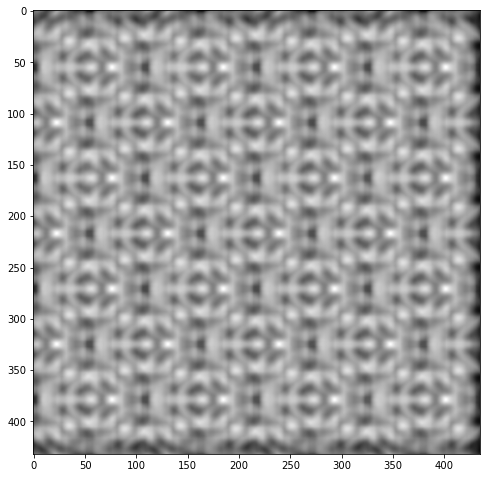

In [9]:
plt.figure(figsize = (8,10))
plt.imshow(result, cmap='gray')

Now let's take from $B$ only high values.

In [10]:
'define some threshold'
treshold = 0.99 # TODO change the threshold to get more accurate results.
centers = result.copy()
centers[result>=treshold] = 1
centers[result<treshold] = 0

Visualize the result

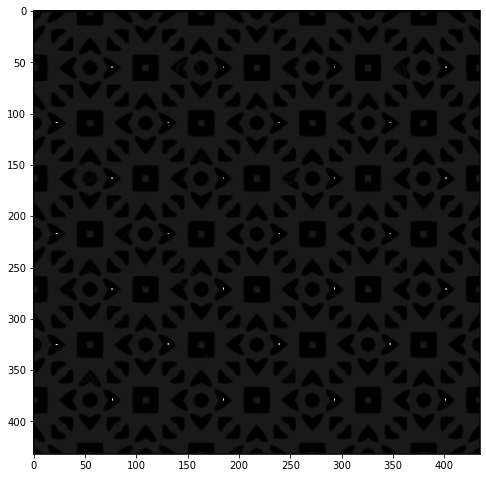

In [11]:
vis = img/255
vis[centers==1] = 1
vis[centers!=1] *= 0.1
plt.figure(figsize = (8,10))
plt.imshow(vis, cmap='gray')

## 2) In the given video a person is showing some hand gestures.

## Your task is to find the frames of this video, where the person's gesture is hand palm !

Reading the video-file and partitioning it to frames with frequency 2 frames per second. It will take some time (if you have issues with RAM, you can keep downsampled versions of frames).

In [15]:
import cv2 #You will need to install opencv, if you don't have. #### pip install opencv-python ####
import time
from tqdm import tqdm
from skimage.color import rgb2gray #You will need to install skimage, if you don't have. #### pip install scikit-image ####
from skimage.transform import rescale
from skimage import filters
from skimage.morphology import (erosion, dilation)

In [16]:
#!pip install opencv-python

In [17]:
vidcap = cv2.VideoCapture(cv2.samples.findFileOrKeep('gesture_video.mov'))
frames = []
frame_rate = 2 # number of frames per second
frame_count = round(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
video_fps = round(vidcap.get(cv2.CAP_PROP_FPS))
frame_indices = np.arange(0, frame_count, round(video_fps/frame_rate))
start = time.time()
for idx in frame_indices:
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ret, frame = vidcap.read()
    frames.append(frame)
time.time() - start

50.13500142097473

Making the extracted frames grayscaled images:

In [18]:
frames_gr = []
for frame in tqdm(frames):
    frames_gr.append(rgb2gray(frame[:,:,::-1]))

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:13<00:00,  5.10it/s]


Downsampling the frames

In [130]:
frames_gr_sm = []
for frame in tqdm(frames_gr):
    frame = rescale(frame, 0.1, anti_aliasing=False)
    frames_gr_sm.append(frame)

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:01<00:00, 60.90it/s]


In [131]:
#Image.fromarray(np.array(frames_gr_sm[0]))

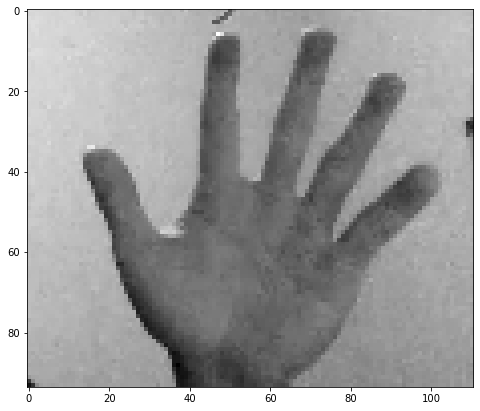

In [132]:
#plt.figure(figsize = (8,10))
#plt.imshow(frames_gr_sm[27], cmap='gray')
k =  frames_gr_sm[27]
new_kernell = k[20:255,100:400] 
plt.figure(figsize = (8,10))

plt.imshow(new_kernell, cmap='gray')



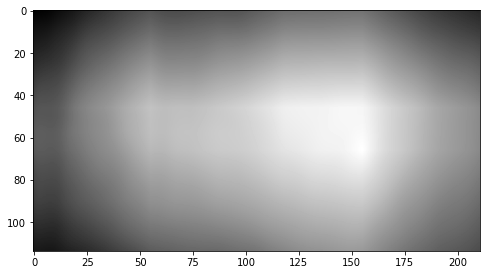

In [133]:
result = get_pattern(k,new_kernell)
plt.figure(figsize = (8,10))
plt.imshow(result, cmap='gray')

In [134]:
'define some threshold'
treshold = 0.99 # TODO change the threshold to get more accurate results.
centers = result.copy()
centers[result>=treshold] = 1
centers[result<treshold] = 0

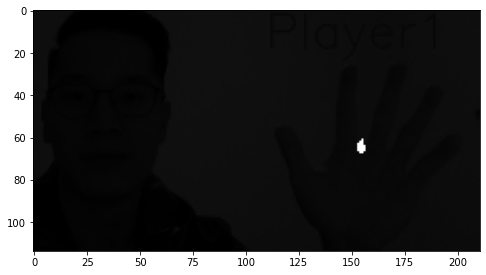

In [150]:
vis = frames_gr_sm[27]
vis[centers==1] = 1
vis[centers!=1] *= 0.1
plt.figure(figsize = (8,10))
plt.imshow(vis, cmap='gray')

In [136]:
print(vis.max())

1.0


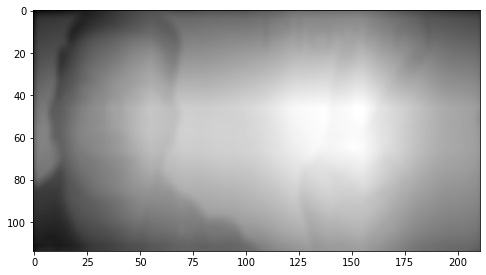

In [153]:
true_labels =[0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
              1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0.]
# I labeled the data for you :D Enjoy
# 0 - Not Palm
# 1 - Palm

result = get_pattern( frames_gr_sm[2],new_kernell)
plt.figure(figsize = (8,10))
plt.imshow(result, cmap='gray')